In [141]:
import pyforest
import math

In [ ]:
# Loading datset

In [180]:
data=pd.read_csv('50_Startups.csv')
data.head()

<IPython.core.display.Javascript object>

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
# Renameing columns

In [151]:
data_rename=data.rename({"R&D Spend":"RD_Spend","Marketing Spend":"Marketing_Spend"},axis=1)
data_rename

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
# droping catogarical column

In [95]:
d=data_rename.drop(columns = 'State')
d.head()

,RD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [ ]:
# No NaN values

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD_Spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [ ]:
# Correlation between indipendent variables Marketing_spend and RD_spend is comparitivly is 0.72 (not very high)

In [6]:
d.corr()

,RD_Spend,Administration,Marketing_Spend,Profit
RD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

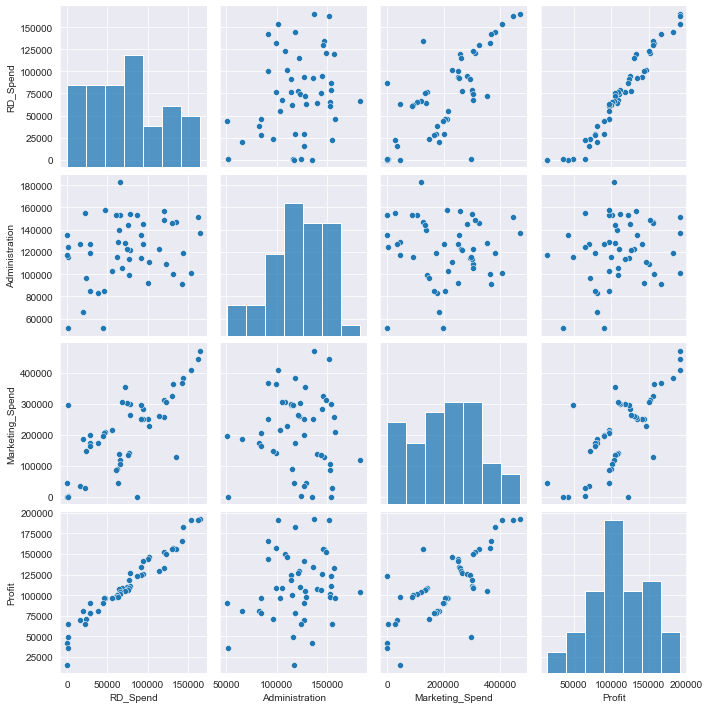

In [7]:
sns.set_style(style='darkgrid')
sns.pairplot(d)

In [ ]:
# Buliding reggresion model for prediction of profit

In [15]:
import statsmodels.formula.api as smf
model1=smf.ols("Profit~RD_Spend+Administration+Marketing_Spend",data=d).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 17 May 2021   Prob (F-statistic):           4.53e-30
Time:                        15:09:15   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD_Spend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
model1.params

Intercept          50122.192990
RD_Spend               0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [ ]:
# P values , administration and markiting_spend have p values > 0.05

In [17]:
model1.pvalues

Intercept          1.057379e-09
RD_Spend           2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64

In [ ]:
# rsquared,adj.rsquared and aic values

In [19]:
model1_values=(model.rsquared,model.rsquared_adj,model.aic)
model1_values

(0.9507459940683246, 0.9475337762901719, 1058.7714985998055)

In [ ]:
'''

Here rsquared value is 0.95 which idicates the model we build is good, but we can improve the model by 
model deletion diagnostics by removing influencers and outliers in our data using cooks distance.We can also try to reduce AIC 
value, lesser the aic value better the model.

'''

In [21]:
slr_model=smf.ols('Profit~Administration',data=d).fit()
slr_model.pvalues

Intercept         0.003824
Administration    0.162217
dtype: float64

In [ ]:
# model for only marketing_spend , which shows the p value is <0.05

In [23]:
slr_model2=smf.ols('Profit~Marketing_Spend',data=d).fit()
slr_model2.pvalues

Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64

In [ ]:
# Finding VIF values for each variable
# As the vif value of variables are < 10 ,we can say variables are good

In [40]:
rsq_rd=smf.ols("RD_Spend~Administration+Marketing_Spend",data=d).fit().rsquared
vif_rd=1/(1-rsq_rd)
rsq_admin=smf.ols("Administration~RD_Spend+Marketing_Spend",data=d).fit().rsquared
vif_admin=1/(1-rsq_admin)
rsq_mark=smf.ols("Marketing_Spend~Administration+RD_Spend",data=d).fit().rsquared
vif_mark=1/(1-rsq_mark)
vif={'variables':['RD_Spend','Administration','Marketing_Spend'],'VIF':[vif_rd,vif_admin,vif_mark]}
vif_df=pd.DataFrame(vif)
vif_df

<IPython.core.display.Javascript object>

,variables,VIF
0,RD_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


In [ ]:
# QQplot for residuals checking if there are following normal distribution

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

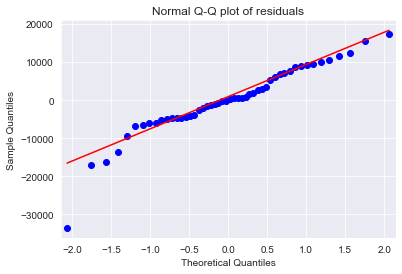

In [41]:
import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
# data point which is far away form line(outlier)

In [49]:
list(np.where(model.resid<-30000))

<IPython.core.display.Javascript object>

[array([49], dtype=int64)]

In [ ]:
#Residual Plot for finding weather there is  Homoscedasticity or not

In [51]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

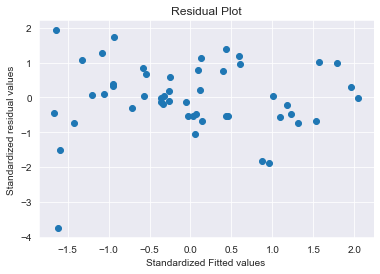

In [52]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [ ]:
#Residual Vs Regressors plots

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

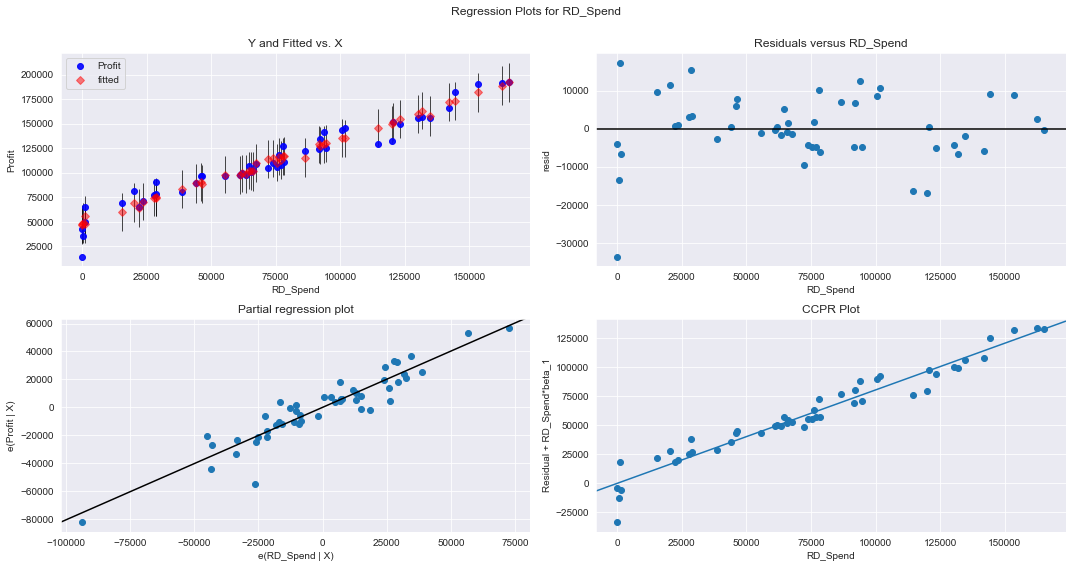

In [53]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD_Spend", fig=fig)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

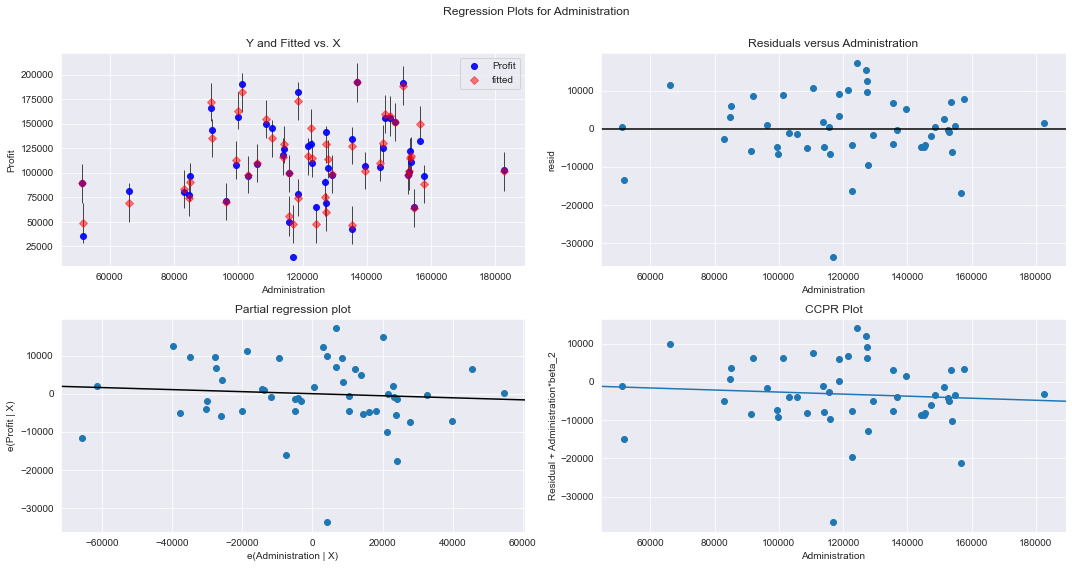

In [54]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

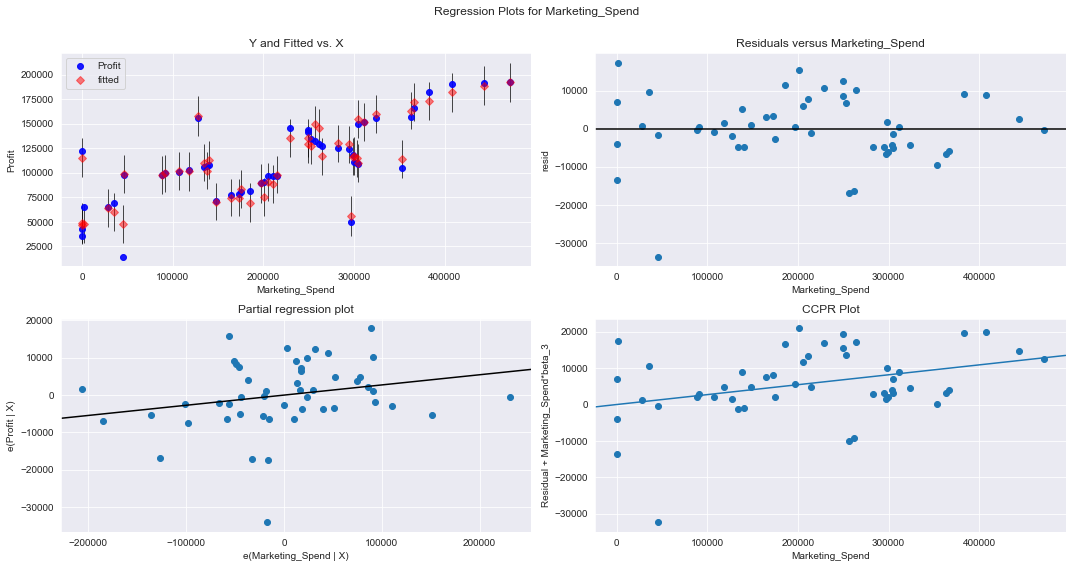

In [55]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

# Model Deletion Diagnostics 

In [ ]:
# COOK'S DISTANCE

In [76]:
model1_influence = model1.get_influence()
(d, _) = model1_influence.cooks_distance

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

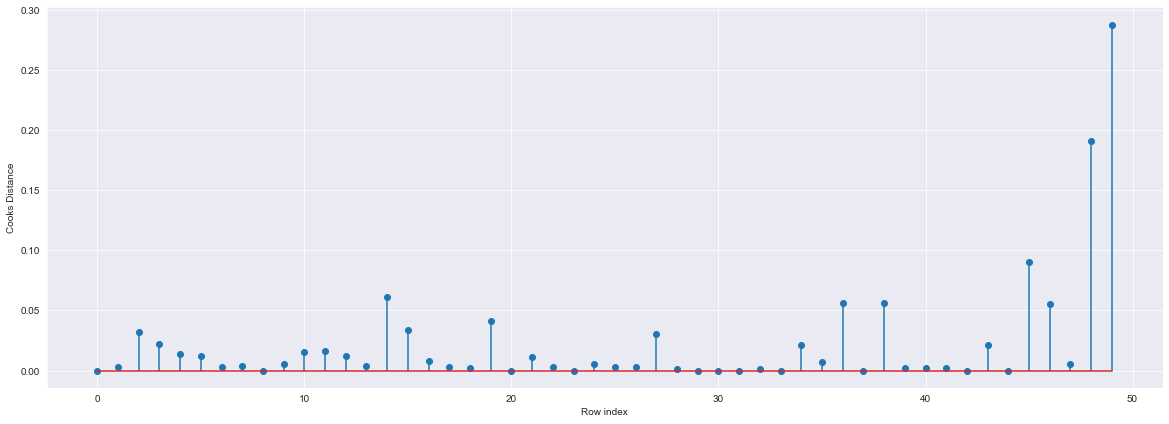

In [85]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(d)), np.round(d, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
# Influensing Data point

In [78]:
(np.argmax(d),np.max(d))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(49, 0.28808229275432634)

In [ ]:
# High Influence points . We can see there are 5 influencing DataPoints : 49,48,46,19,6

<IPython.core.display.Javascript object>

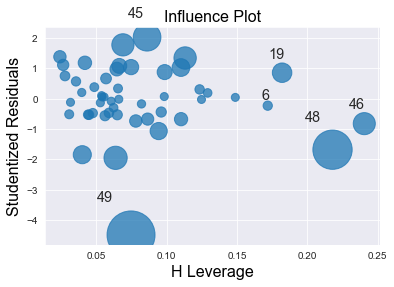

In [181]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [ ]:
# Most influensing DataPoint

In [62]:
d[d.index.isin([49])]

,RD_Spend,Administration,Marketing_Spend,Profit
49,0.0,116983.8,45173.06,14681.4


In [96]:
d.head()

,RD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [ ]:
# Droping the influensing DataPoint

In [97]:
d_drp=d.drop(d.index[49],axis=0).reset_index()
d_drp.tail()

,index,RD_Spend,Administration,Marketing_Spend,Profit
44,44,22177.74,154806.14,28334.72,65200.33
45,45,1000.23,124153.04,1903.93,64926.08
46,46,1315.46,115816.21,297114.46,49490.75
47,47,0.00,135426.92,0.00,42559.73
48,48,542.05,51743.15,0.00,35673.41


In [106]:
d_new=d_drp.drop(['index'],axis=1)
d_new

,RD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [ ]:
# Buliding reggresioin model after removing most influencing DataPoint

In [99]:
model2=smf.ols("Profit~RD_Spend+Administration+Marketing_Spend",data=d_new).fit()
model2_values=(model2.rsquared,model2.rsquared_adj,model2.aic)
model2_values

(0.9613162435129847, 0.9587373264138503, 1020.5652974526367)

## Improving the model

In [ ]:
# again checing for influencing point by cook's distance

In [100]:
model2_influence = model2.get_influence()
(d_new, _) = model2_influence.cooks_distance

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

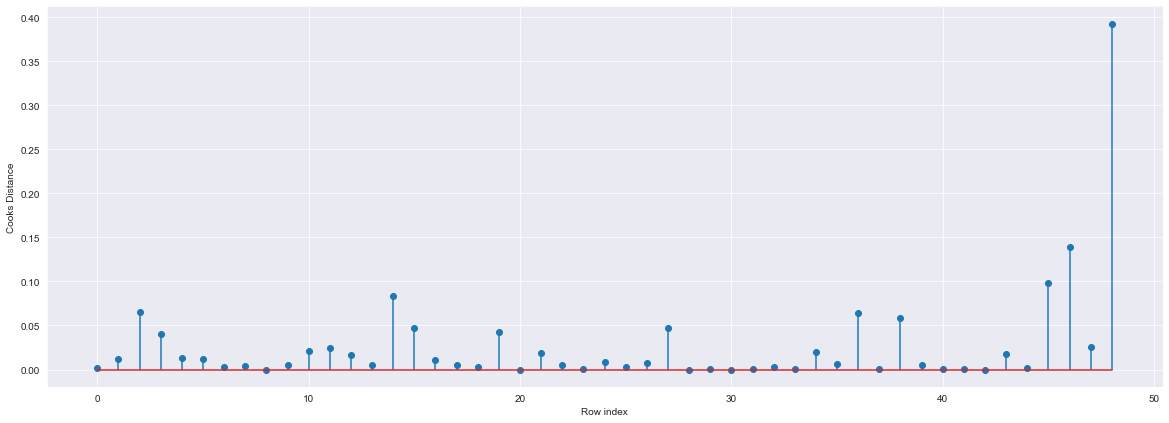

In [104]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(d_new)), np.round(d_new, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
# influcencing datapoint

In [103]:
(np.argmax(d_new),np.max(d_new))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(48, 0.39274420556321554)

In [ ]:
# droping the datapoint

In [160]:
d_new2=d_new.drop(d_new.index[[48]],axis=0).reset_index()
d_new2.tail()

,index,RD_Spend,Administration,Marketing_Spend,Profit
43,43,15505.73,127382.30,35534.17,69758.98
44,44,22177.74,154806.14,28334.72,65200.33
45,45,1000.23,124153.04,1903.93,64926.08
46,46,1315.46,115816.21,297114.46,49490.75
47,47,0.00,135426.92,0.00,42559.73


In [164]:
d_new_2=d_new2.drop(['index'],axis=1)
d_new_2

,RD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [ ]:
# Again building the model.Here we got higher rsquared values and lower AIC value for this model

In [161]:
model3=smf.ols("Profit~RD_Spend+Administration+Marketing_Spend",data=d_new2).fit()
model3_values=(model3.rsquared,model3.rsquared_adj,model3.aic)
model3_values

(0.9626766170294073, 0.960131840917776, 994.6690439260116)

In [162]:
model_final=model3
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Mon, 17 May 2021   Prob (F-statistic):           2.03e-31
Time:                        18:35:53   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
RD_Spend            0.7895      0.036     21.718      0.000       0.716       0.863
Administration     -0.0633      0.044     -1.442      0.156      -0.152       0.025
Marketing_Spend     0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Corelation matrix for final dataset,we can see there are no high r values

In [166]:
d_new_2.corr()

,RD_Spend,Administration,Marketing_Spend,Profit
RD_Spend,1.000000,0.173065,0.692606,0.978661
Administration,0.173065,1.000000,-0.144120,0.110473
Marketing_Spend,0.692606,-0.144120,1.000000,0.718207
Profit,0.978661,0.110473,0.718207,1.000000


# Predicting for test data

In [ ]:
# Taking test data from traing dataset

In [127]:
test_data=d.iloc[20:35,:3]
test_data

,RD_Spend,Administration,Marketing_Spend
20,76253.86,113867.30,298664.47
21,78389.47,153773.43,299737.29
22,73994.56,122782.75,303319.26
23,67532.53,105751.03,304768.73
24,77044.01,99281.34,140574.81
25,64664.71,139553.16,137962.62
26,75328.87,144135.98,134050.07
27,72107.60,127864.55,353183.81
28,66051.52,182645.56,118148.20
29,65605.48,153032.06,107138.38


In [133]:
acct_values=d.iloc[20:35,3:].values
acct_values

array([[118474.03],
       [111313.02],
       [110352.25],
       [108733.99],
       [108552.04],
       [107404.34],
       [105733.54],
       [105008.31],
       [103282.38],
       [101004.64],
       [ 99937.59],
       [ 97483.56],
       [ 97427.84],
       [ 96778.92],
       [ 96712.8 ]])

In [ ]:
# Predicted values for test dataset

In [167]:
pred_values_final=model_final.predict(test_data).values
pred_values_final

array([117133.0612167 , 116309.22709875, 114863.21169632, 110864.90055894,
       116009.98846338, 103641.27806068, 111704.1628601 , 113893.99203167,
       101671.53647611, 103009.36638408, 102256.7293717 ,  99182.29441439,
       101752.15766831, 100008.33434856,  89323.2954028 ])

### Root Mean Square Error (RMSE)

In [186]:
mse = sklearn.metrics.mean_squared_error(acct_values, pred_values_final)
rmse = math.sqrt(mse)
rmse

<IPython.core.display.Javascript object>

4723.322419138779

# R-squared and AIC values for all the models 

In [170]:
model_values_df=pd.DataFrame({'model 1':model1_values,'model 2':model2_values,'Final Model':model3_values},index=['rsquared','rsquared_adj','AIC'])
model_values_df

<IPython.core.display.Javascript object>

,model 1,model 2,Final Model
rsquared,0.950746,0.961316,0.962677
rsquared_adj,0.947534,0.958737,0.960132
AIC,1058.771499,1020.565297,994.669044


In [ ]:
'''

Here we can see the r-squared values is higher and AIC value is lesser for final model by which we can say the model is better 
than the previous models.

'''